In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
## Read csv file using Pandas

Titanic_Data = pd.read_csv('titanic_data.csv')
Titanic_Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
Titanic_Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Converted the Sex column into binary classes and converted the data type to integer

gender = pd.get_dummies(Titanic_Data['Sex'], drop_first=True).astype('int64')
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [5]:
## Added the encoded 'Sex' column into the dataframe with the label 'Gender'

Titanic_Data['Gender']=gender
Titanic_Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [6]:
## Dropped columns that were irrelevant to regression model

Titanic_Data.drop(['Name','Sex','Ticket','Fare','Cabin','Embarked','PassengerId','SibSp','Parch'], axis=1, inplace=True)

In [60]:
Titanic_Data

,Survived,Pclass,Age,Gender
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1
...,...,...,...,...
886,0,2,27.0,1
887,1,1,19.0,0
888,0,3,NaN,0
889,1,1,26.0,1


In [61]:
Titanic_Data.dtypes

Survived      int64
Pclass        int64
Age         float64
Gender        int64
dtype: object

In [62]:
Titanic_Data['Age'].mean()

29.69911764705882

In [63]:
## Converted the Nan in the 'Age' column to numeric data using Numpy

Titanic_Data .replace('Nan', np.nan)


,Survived,Pclass,Age,Gender
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1
...,...,...,...,...
886,0,2,27.0,1
887,1,1,19.0,0
888,0,3,NaN,0
889,1,1,26.0,1


In [7]:
## Filled the null values in the 'Age' column with rounded mean value of 'Age' 

Titanic_Data_Final=Titanic_Data.fillna(30)
Titanic_Data_Final

,Survived,Pclass,Age,Gender
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1
...,...,...,...,...
886,0,2,27.0,1
887,1,1,19.0,0
888,0,3,30.0,0
889,1,1,26.0,1


In [65]:
Titanic_Data_Final.isnull().sum()

Survived    0
Pclass      0
Age         0
Gender      0
dtype: int64

In [66]:
Titanic_Data_Final.head()

,Survived,Pclass,Age,Gender
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1


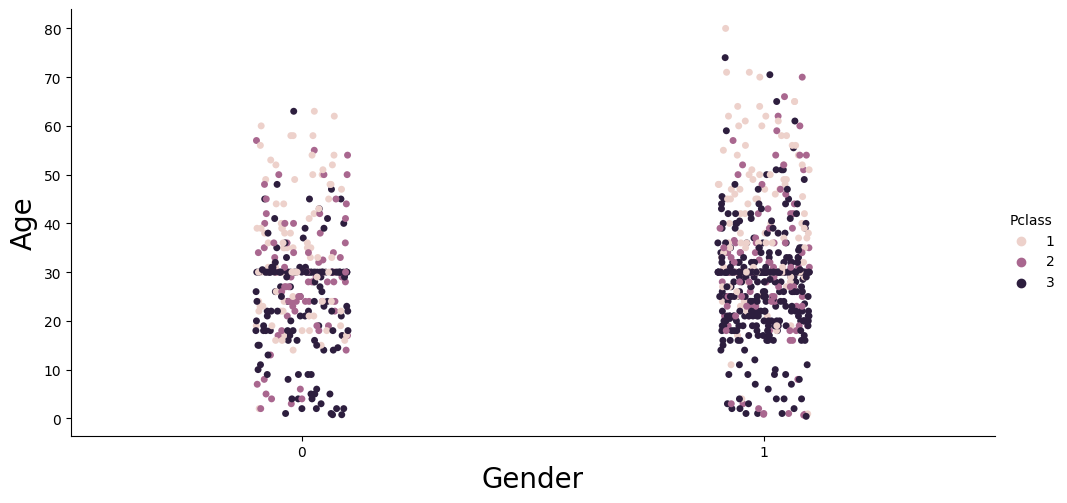

In [8]:
## Generated categorical scatter plot to reveal patterns in passenger classes based on 'Age' and 'Gender'
 
sns.catplot(x='Gender', y='Age', data=Titanic_Data_Final, hue='Pclass', aspect=2)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Age', fontsize=20)
plt.show()


In [9]:
## Used correlation fuction to see relation between different data fields

Titanic_Data_Final.corr()

,Survived,Pclass,Age,Gender
Survived,1.000000,-0.338481,-0.070657,-0.543351
Pclass,-0.338481,1.000000,-0.329727,0.131900
Age,-0.070657,-0.329727,1.000000,0.084660
Gender,-0.543351,0.131900,0.084660,1.000000


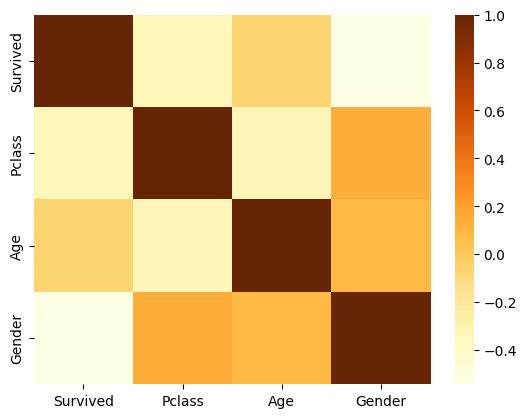

In [10]:
## Generated heatmap of data correlation using Seaborn

sns.heatmap(Titanic_Data_Final.corr(), cmap='YlOrBr')
plt.show()

<Axes: ylabel='Frequency'>

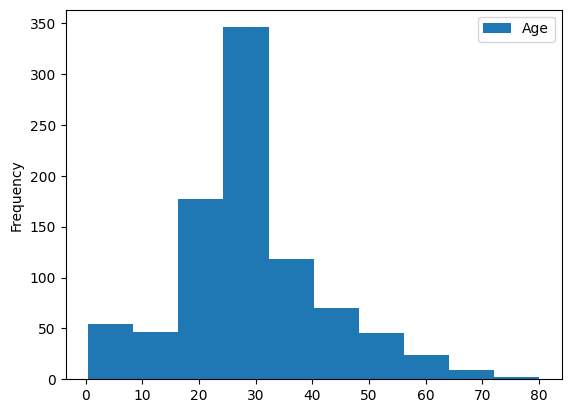

In [83]:
## Produced histogram to reveal quantities of different age groups aboard Titanic

Titanic_Data_Final.plot.hist(y='Age')

<Axes: ylabel='Frequency'>

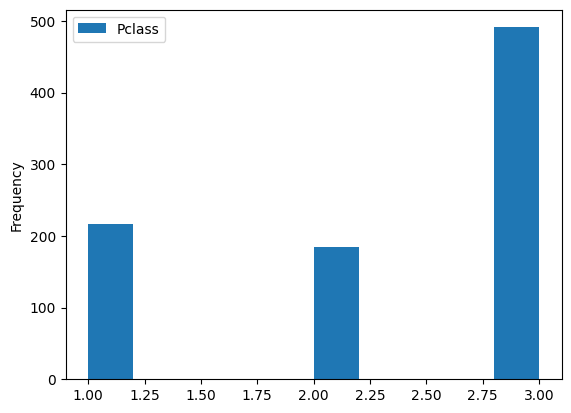

In [84]:
## Histogram plot showing the quantity of each ticket class held

Titanic_Data_Final.plot.hist(y='Pclass')

In [70]:
## Assigned 'Survived' column to target variable Y

Y = Titanic_Data_Final['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [71]:
## Dropped the 'Survived' column to assign the remaining columns to predictor variable X

X = Titanic_Data_Final.drop(['Survived'], axis=1)
X

,Pclass,Age,Gender
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
886,2,27.0,1
887,1,19.0,0
888,3,30.0,0
889,1,26.0,1


In [72]:
## Split the X and Y variables into train and test data

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=5)

In [73]:
X_train

,Pclass,Age,Gender
887,1,19.0,0
416,2,34.0,0
479,3,2.0,0
134,2,25.0,1
588,3,22.0,1
...,...,...,...
400,3,39.0,1
118,1,24.0,1
701,1,35.0,1
206,3,32.0,1


In [74]:
Y_train

887    1
416    1
479    1
134    0
588    0
      ..
400    1
118    0
701    1
206    0
867    0
Name: Survived, Length: 712, dtype: int64

In [75]:
## Fit training data to Logistic Regression model

LR=LogisticRegression()
LR.fit(X_train,Y_train)


LogisticRegression()

In [76]:
## Generated target predictions using the test data in the model. Passed predicte values into Pandas dataframe

Predict = LR.predict(X_test)
Predict

df = pd.DataFrame(LR.predict(X_test),columns=['Survived'])
df

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
174,0
175,0
176,0
177,1


In [77]:
df.value_counts()

Survived
0           119
1            60
Name: count, dtype: int64

In [78]:
## Generated confusion matrix to measure accuracy of logistic Regression model
confusion_matrix(Y_test, Predict)

array([[99, 12],
       [20, 48]], dtype=int64)

In [79]:
pd.DataFrame(confusion_matrix(Y_test, Predict), columns=['Predicted No','Predicted Yes'], index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,99,12
Actual Yes,20,48
